# CODE FILE 01b - Exploratory Analysis Pt. 1
#### Given the manually processed Pokemon dataset, performs data cleaning, feature conversion, and data splitting into train and validation sets, and makes 2 new .csv files of each of these two new sets.
<br>

### STEP 1: Importing data and libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from IPython.display import display

In [3]:
df = pd.read_csv('pokemon_boolean_types_and_manual_preprocessing.csv')

pd.options.display.max_columns = None

For consistency with actual pokemon type names, we must rename one column:

In [4]:
df = df.rename(columns={"against_fight": "against_fighting"})

Viewing the dataframe:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         801 non-null    int64  
 1   abilities          801 non-null    object 
 2   against_bug        801 non-null    float64
 3   against_dark       801 non-null    float64
 4   against_dragon     801 non-null    float64
 5   against_electric   801 non-null    float64
 6   against_fairy      801 non-null    float64
 7   against_fighting   801 non-null    float64
 8   against_fire       801 non-null    float64
 9   against_flying     801 non-null    float64
 10  against_ghost      801 non-null    float64
 11  against_grass      801 non-null    float64
 12  against_ground     801 non-null    float64
 13  against_ice        801 non-null    float64
 14  against_normal     801 non-null    float64
 15  against_poison     801 non-null    float64
 16  against_psychic    801 non

In [6]:
df.head(5)

,Unnamed: 0,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,EvoChain,can_hatch,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,is_fire_type,is_water_type,is_grass_type,is_electric_type,is_ground_type,is_bug_type,is_normal_type,is_ice_type,is_flying_type,is_poison_type,is_fighting_type,is_rock_type,is_steel_type,is_fairy_type,is_dark_type,is_ghost_type,is_dragon_type,is_psychic_type,pure_type
0,0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,1,True,88.1,1,65,65,45,6.9,1,0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1,60,Fushigisouフシギソウ,Ivysaur,1,False,88.1,2,80,80,60,13,1,0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2,80,Fushigibanaフシギバナ,Venusaur,1,False,88.1,3,122,120,80,100,1,0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,2,True,88.1,4,60,50,65,8.5,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,2,False,88.1,5,80,65,80,19,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [7]:
df.describe()

,Unnamed: 0,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,hp,EvoChain,percentage_male,pokedex_number,sp_attack,sp_defense,speed,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,400.000000,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,68.958801,194.304619,55.155761,401.000000,71.305868,70.911361,66.334582,3.690387,0.087391
std,231.373075,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,26.576015,120.643533,20.261623,231.373075,32.353826,27.942501,28.907662,1.930420,0.282583
min,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,1.000000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,1.000000,0.000000
25%,200.000000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,50.000000,86.000000,50.000000,201.000000,45.000000,50.000000,45.000000,2.000000,0.000000
50%,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,65.000000,191.000000,50.000000,401.000000,65.000000,66.000000,65.000000,4.000000,0.000000
75%,600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,80.000000,298.000000,50.000000,601.000000,91.000000,90.000000,85.000000,5.000000,0.000000
max,800.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,255.000000,414.000000,100.000000,801.000000,194.000000,230.000000,180.000000,7.000000,1.000000


___
### STEP 2: Cleaning
Remove all Pokemon rows that are legendary, since in normal gameplay legendary Pokemon can never hatch from an egg:

In [8]:
df = df.set_index("is_legendary")
df.drop(1, axis=0, inplace=True) # Delete all rows with is_legendary features that are labelled '1'.

Then remove is_legendary column (currently the index) since it is no longer a distinguishing feature:

In [9]:
df.reset_index(drop=True, inplace=True)

731 (non-legendary) Pokemon will be left:

In [10]:
del df['Unnamed: 0']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          731 non-null    object 
 1   against_bug        731 non-null    float64
 2   against_dark       731 non-null    float64
 3   against_dragon     731 non-null    float64
 4   against_electric   731 non-null    float64
 5   against_fairy      731 non-null    float64
 6   against_fighting   731 non-null    float64
 7   against_fire       731 non-null    float64
 8   against_flying     731 non-null    float64
 9   against_ghost      731 non-null    float64
 10  against_grass      731 non-null    float64
 11  against_ground     731 non-null    float64
 12  against_ice        731 non-null    float64
 13  against_normal     731 non-null    float64
 14  against_poison     731 non-null    float64
 15  against_psychic    731 non-null    float64
 16  against_rock       731 non

Filtering away Pokemon that have 'can_hatch'==0 i.e. Pokemon whose eggs are unable to be obtained in normal gameplay.
354 Pokemon (whose eggs can be obtained in normal gameplay) are left:

In [11]:
df = df[df.can_hatch != 0]
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,hp,EvoChain,percentage_male,pokedex_number,sp_attack,sp_defense,speed,generation
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,3.540000e+02,354.000000,354.000000,337.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.986582,1.048729,0.957627,1.114407,1.038842,1.075565,1.108757,1.173729,0.935028,1.068503,1.084746,1.169492,0.889831,0.980932,1.018362,1.248588,1.000706,1.058616,60.850282,5373.107345,68.290960,341.290960,59.432203,1.032371e+06,56.079096,193.093220,53.813650,393.231638,52.884181,57.392655,54.652542,3.635593
std,0.542131,0.384626,0.316516,0.662890,0.447778,0.701660,0.646549,0.560290,0.547996,0.780701,0.705769,0.669458,0.263870,0.520293,0.468575,0.638971,0.506158,0.595298,25.696257,1571.603521,11.726466,85.887551,27.217770,1.653144e+05,23.881897,117.753571,18.770083,227.605661,21.821985,24.688566,24.360621,1.923459
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.500000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,10.000000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,1.000000
25%,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,45.000000,5120.000000,70.000000,290.000000,40.000000,1.000000e+06,41.000000,91.000000,50.000000,202.250000,38.250000,40.000000,35.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000,5120.000000,70.000000,319.500000,50.000000,1.000000e+06,50.000000,182.500000,50.000000,367.500000,50.000000,50.000000,50.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,388.750000,70.000000,1.059860e+06,65.000000,293.750000,50.000000,591.500000,65.000000,65.000000,70.000000,5.000000
max,4.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,10240.000000,140.000000,620.000000,230.000000,1.640000e+06,250.000000,400.000000,100.000000,782.000000,140.000000,230.000000,150.000000,7.000000


Removing can_hatch column since it is no longer a distinguishing feature:

In [12]:
del df['can_hatch']

Remove EvoChain column since usually only one Pokemon in an EvoChain can hatch:

In [13]:
del df['EvoChain']

___
##  Feature Conversions and Their Distributions
### STEP 3.1: Converting numeric features to categorical

#### percentage_male
For percentage_male, there are 7 unique float percentage_male values and some NA values indicating agender Pokemon.

In [14]:
df['percentage_male'].unique()

array([ 88.1,  50. ,   0. , 100. ,  24.6,  75.4,   nan,  11.2])

In [15]:
df['percentage_male'].isna().sum()

17

Showing distribution of percentage_male:

<AxesSubplot:xlabel='percentage_male', ylabel='Count'>

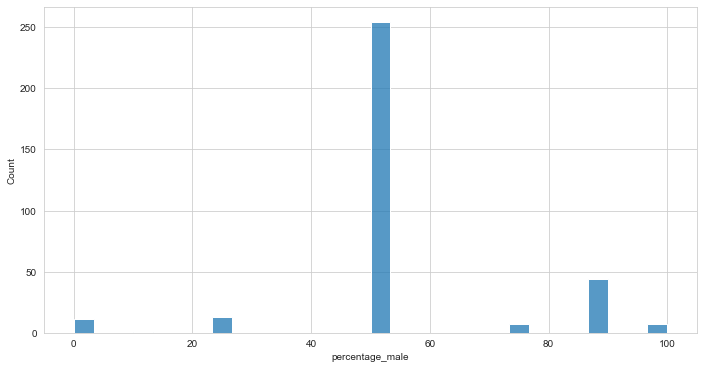

In [16]:
fig, ax = pyplot.subplots(figsize=(11.7, 6))

sns.histplot(ax=ax, data=df['percentage_male'], bins=30)

In [17]:
df['percentage_male'].value_counts()

50.0     254
88.1      44
24.6      13
0.0       11
75.4       7
100.0      7
11.2       1
Name: percentage_male, dtype: int64

Categorizing all percentage_male values into 4 factors (Objects):

In [18]:
def impute_percent_male(cols):
    percent = cols[0]
    
    if percent < 50:
        return "<50"
    
    elif percent == 50:
        return "50"
    
    elif percent > 50:
        return ">50"
    
    else:
        return "agender"

Applying above function:

In [19]:
df['percentage_male'] = df[['percentage_male']].apply(impute_percent_male, axis=1)

Converting these objects to type Category:

In [20]:
percent_cats_to_order = df['percentage_male'].unique()
df['percentage_male'] = df['percentage_male'].astype('category')
df['percentage_male'].dtypes

CategoricalDtype(categories=['50', '<50', '>50', 'agender'], ordered=False)

Reordering these categories:

In [21]:
df['percentage_male'] = df['percentage_male'].cat.reorder_categories(['<50','50', '>50', 'agender'], ordered=True)
df['percentage_male'].dtypes

CategoricalDtype(categories=['<50', '50', '>50', 'agender'], ordered=True)

<br>

#### experience_growth
We see there are 6 unique experience_growth integer values:

In [22]:
df['experience_growth'].unique()

array([1059860, 1000000, 1250000,  800000, 1640000,  600000], dtype=int64)

In [23]:
df['experience_growth'].value_counts()

1000000    172
1059860     75
1250000     53
800000      35
600000      11
1640000      8
Name: experience_growth, dtype: int64

Show distribution of experience_growth:

<AxesSubplot:xlabel='experience_growth', ylabel='Count'>

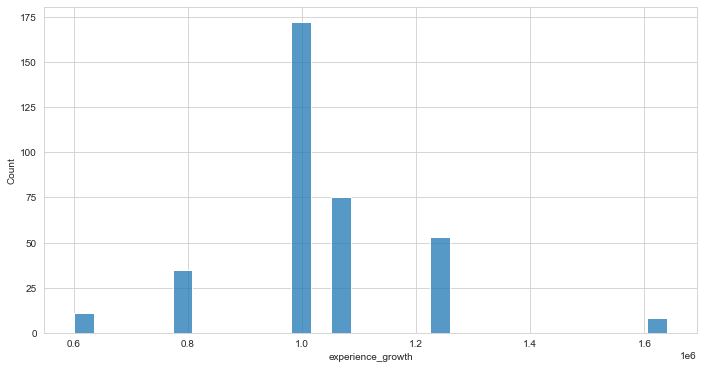

In [24]:
a4_dims = (11.7, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.histplot(ax=ax, data=df['experience_growth'], bins=30)

Binning these values into 3 Objects:
<br>
We choose to bin into these 3 Objects as values 600,000 and 1,640,000 have concerningly few occurences.

In [25]:
def impute_exp_growth(cols):
    exp = cols[0]
    
    if exp < 1000000  :
        return "<1M"
    elif exp >=1250000:
        return ">=1.25M"
    else:
        return "1M-1.25M"

Applying above function:

In [26]:
df['experience_growth'] = df[['experience_growth']].apply(impute_exp_growth, axis=1)

Converting these objects to type Category, then ordering the categories:

In [27]:
df['experience_growth'] = df['experience_growth'].astype('category')

df['experience_growth'] = df['experience_growth'].cat.reorder_categories(['<1M', '1M-1.25M', '>=1.25M'], ordered=True)
df['experience_growth'].dtypes

CategoricalDtype(categories=['<1M', '1M-1.25M', '>=1.25M'], ordered=True)

Checking out the final categorized and ordered result:

In [28]:
df['experience_growth'].value_counts()

1M-1.25M    247
>=1.25M      61
<1M          46
Name: experience_growth, dtype: int64

<br>

#### base_happiness
There are 5 unique integer base_happiness values:

In [29]:
df['base_happiness'].unique()

array([ 70, 140,  35, 100,   0], dtype=int64)

In [30]:
df['base_happiness'].value_counts()

70     325
35      23
140      3
100      2
0        1
Name: base_happiness, dtype: int64

Looking at base_happiness distribution:

<AxesSubplot:xlabel='base_happiness', ylabel='Count'>

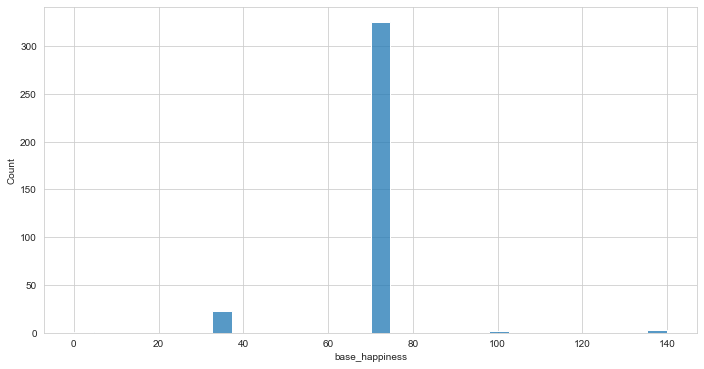

In [31]:
fig, ax = pyplot.subplots(figsize=(11.7, 6))

sns.histplot(ax=ax, data=df['base_happiness'], bins=30)

Categorizing base_happiness values into 2 factors (objects):
We choose to bin into these two categories as there are too few occurences for values besides '70' and '35',
and if were to include a bin of ">70" by itself, the values in that bin would be too few as well.

In [32]:
def impute_base_happiness(cols):
    happy = cols[0]
    
    if happy < 70:
        return "<70"
    else:
        return ">=70"

Applying above function:

In [33]:
df['base_happiness'] = df[['base_happiness']].apply(impute_base_happiness, axis=1)

Converting base_happiness Objects to Categorical variables, then ordering categories:

In [34]:
df['base_happiness'] = df['base_happiness'].astype('category')

df['base_happiness'] = df['base_happiness'].cat.reorder_categories(['<70','>=70'], ordered=True)
df['base_happiness'].dtypes

CategoricalDtype(categories=['<70', '>=70'], ordered=True)

___
### STEP 3.2: Converting disrete numeric features and object features to continous numeric

#### base_egg_steps

In [35]:
df['base_egg_steps'].dtypes

dtype('int64')

In [36]:
df['base_egg_steps'].value_counts()

5120     212
3840      59
6400      35
10240     20
7680      14
2560      10
8960       3
1280       1
Name: base_egg_steps, dtype: int64

We choose to bin all base_egg_steps values into these categories as there are too few occurences for values '1280' and '8960':

In [37]:
def bin_egg_steps(cols):
    egg_steps = cols[0]
    
    if egg_steps <= 3840:
        return "<=3840"
    if egg_steps == 5120:
        return "5120"
    if egg_steps == 6400:
        return "6400"
    if egg_steps >= 7680:
        return ">=7680"

Applying above function:

In [38]:
df['base_egg_steps'] = df[['base_egg_steps']].apply(bin_egg_steps, axis=1)

Converting base_happiness Objects to Categorical variables, then ordering the categories:

In [39]:
df['base_egg_steps'] = df['base_egg_steps'].astype('category')

df['base_egg_steps'] = df['base_egg_steps'].cat.reorder_categories(['<=3840','5120','6400','>=7680'], ordered=True)
df['base_egg_steps'].dtypes

CategoricalDtype(categories=['<=3840', '5120', '6400', '>=7680'], ordered=True)

Show new distribution of base_egg_steps:

<AxesSubplot:xlabel='base_egg_steps', ylabel='Count'>

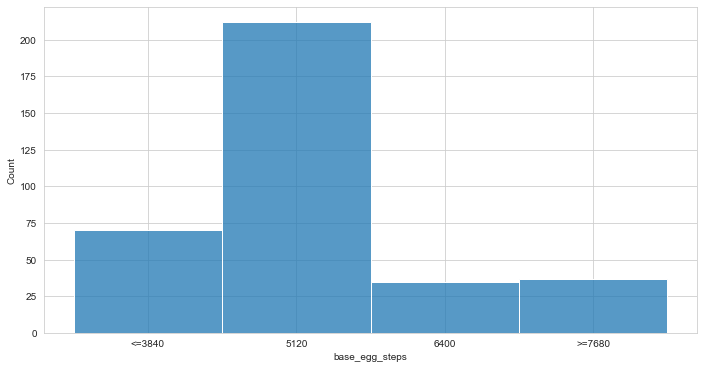

In [40]:
a4_dims = (11.7, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.histplot(ax=ax, data=df['base_egg_steps'], bins=30)

<br>

#### capture_rate
Converting capture_rate from type Object to Float:

In [41]:
df['capture_rate'] = pd.to_numeric(df['capture_rate'],errors='coerce')

In [42]:
df[['capture_rate']].describe()

,capture_rate
count,353.000000
mean,149.385269
std,81.695902
min,3.000000
25%,45.000000
50%,190.000000
75%,220.000000
max,255.000000


Show distribution of capture_rate:

<AxesSubplot:xlabel='capture_rate', ylabel='Count'>

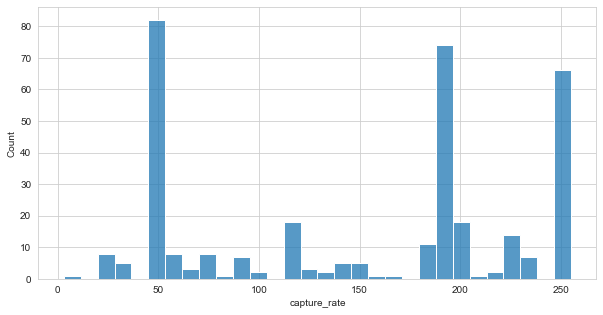

In [43]:
fig, ax = pyplot.subplots(figsize=(10,5))

sns.histplot(ax=ax, data=df['capture_rate'], bins=30)

Viewing and handling NA values (1 in total):

In [44]:
df['capture_rate'].isna().sum()

1

In [58]:
df['capture_rate'] = df['capture_rate'].fillna(0)
df.loc[df['capture_rate'] == 0]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_fire_type,is_water_type,is_grass_type,is_electric_type,is_ground_type,is_bug_type,is_normal_type,is_ice_type,is_flying_type,is_poison_type,is_fighting_type,is_rock_type,is_steel_type,is_fairy_type,is_dark_type,is_ghost_type,is_dragon_type,is_psychic_type,pure_type


Pokemon Minior originally has capture_rate NA value because it is a special case (comes in two capture_rate values), which we can ignore, since it is only one observation.
So we will remove this data point next.

In [59]:
df = df[df.capture_rate != 0]
df['capture_rate'].isna().sum()

0

<br>

#### height_m and weight_kg
Converting height_m and weight_kg from Objects to Floats:

In [50]:
df['height_m'] = pd.to_numeric(df['height_m'],errors='coerce')
df['weight_kg'] = pd.to_numeric(df['weight_kg'],errors='coerce')

Show distribution of height_m:

<AxesSubplot:xlabel='height_m', ylabel='Count'>

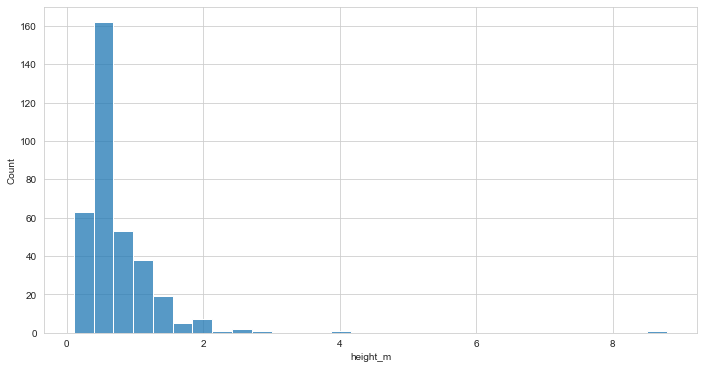

In [51]:
a4_dims = (11.7, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.histplot(ax=ax, data=df['height_m'], bins=30)

Show distribution of weight_kg:

<AxesSubplot:xlabel='weight_kg', ylabel='Count'>

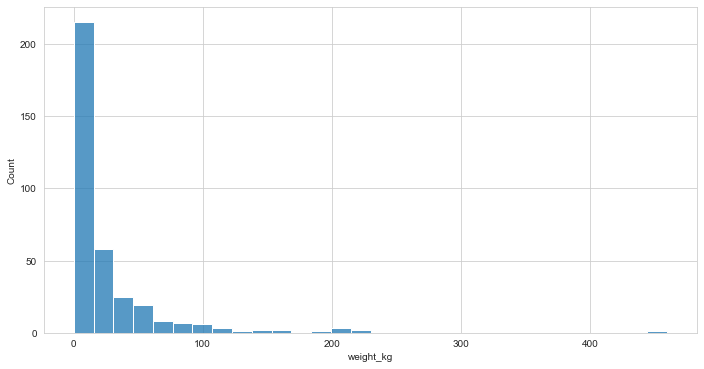

In [52]:
a4_dims = (11.7, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.histplot(ax=ax, data=df['weight_kg'], bins=30)

<br>

___
### STEP 4: Splitting and saving data into training and validation sets as .csv files

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
SEED_VALUE = 99
y= df.base_egg_steps
x=df.drop('base_egg_steps',axis=1)
 
# splitting:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25, random_state=SEED_VALUE)

In [55]:
x_train.loc[:, 'base_egg_steps'] = y_train

C:\Users\leona\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\leona\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [56]:
x_val.loc[:, 'base_egg_steps'] = y_val

In [57]:
# saving our training set:
x_train.to_csv('pokemon_cleaned_trainingset.csv', index=False)

# saving our validation set:
x_val.to_csv('pokemon_cleaned_validationset.csv', index=False)